In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
pip install optuna

     |████████████████████████████████| 296kB 8.1MB/s 
     |████████████████████████████████| 163kB 36.4MB/s 
     |████████████████████████████████| 81kB 12.1MB/s 
     |████████████████████████████████| 81kB 11.1MB/s 
     |████████████████████████████████| 143kB 35.4MB/s 
     |████████████████████████████████| 51kB 9.1MB/s 
     |████████████████████████████████| 112kB 33.6MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-cp37-none-any.whl size=11107 sha256=3869ef0a2c792235d54db207bb635dd46344d37ecdd9d33c5e9876f8d26bfdde
  Stored in directory: /root/.cache/pip/wheels/25/af/b8/3407109267803f4015e1ee2ff23be0c8c19ce4008665931ee1
Successfully built pyperclip


In [3]:
pip install catboost --no-cache-dir

     |████████████████████████████████| 67.3MB 1.3MB/s 


In [4]:
pip install shap


     |████████████████████████████████| 358kB 7.4MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491615 sha256=bba33bd09ca40ebf10d8ba6aa76835f77082c73919d48c5f261b41868a0baa77
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [5]:
pip install -I shap


Processing /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283/shap-0.39.0-cp37-cp37m-linux_x86_64.whl
     |████████████████████████████████| 15.3MB 211kB/s 
     |████████████████████████████████| 81kB 11.8MB/s 
     |████████████████████████████████| 27.4MB 107kB/s 
     |████████████████████████████████| 22.3MB 91kB/s 
  Using cached https://files.pythonhosted.org/packages/78/c2/b3f55dfdb8af9812fdb9baf70cacf3b9e82e505b2bd4324d588888b81202/slicer-0.0.7-py3-none-any.whl
     |████████████████████████████████| 3.4MB 56.9MB/s 
     |████████████████████████████████| 9.9MB 50.9MB/s 
     |████████████████████████████████| 307kB 49.4MB/s 
     |████████████████████████████████| 25.3MB 1.3MB/s 
     |████████████████████████████████| 788kB 51.1MB/s 
     |████████████████████████████████| 512kB 53.5MB/s 
     |████████████████████████████████| 235kB 58.2MB/s 
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.20.2 which is incomp

In [61]:
import optuna
import xgboost
import catboost
import lightgbm as lgb
from lightgbm import LGBMRegressor 
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar
import seaborn as sn
from datetime import datetime
from numpy import mean, std
from math import sqrt
from scipy.stats import skew
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, train_test_split, KFold, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.preprocessing import LabelEncoder


In [62]:
# Import dataset
train = pd.read_csv("/content/drive/MyDrive/train.csv")

In [63]:
train, test=train_test_split(train, test_size=.2)

In [64]:
print(train.shape)
print(test.shape)

(8708, 12)
(2178, 12)




*   datetime - hourly date + timestamp 
*   season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
*   holiday - whether the day is considered a holiday
*   workingday - whether the day is neither a weekend nor holiday
*   weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
*   temp - temperature in Celsius
*   atemp - "feels like" temperature in Celsius
*   humidity - relative humidity
*   windspeed - wind speed
*   casual - number of non-registered user rentals initiated
*   registered - number of registered user rentals initiated
*   count - number of total rentals





**Exploration and Preprocessing of Data**

As a first step we can take a look in the data

In [65]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
2408,2011-06-08 06:00:00,2,0,1,1,26.24,28.790,89,8.9981,13,103,116
7729,2012-06-02 10:00:00,2,0,0,1,24.60,31.060,53,19.9995,145,348,493
2554,2011-06-14 08:00:00,2,0,1,1,23.78,27.275,49,26.0027,45,441,486
6855,2012-04-03 23:00:00,2,0,1,1,20.50,24.240,59,0.0000,13,66,79
8134,2012-06-19 07:00:00,2,0,1,2,24.60,28.790,78,8.9981,18,462,480


In [66]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
927,2011-03-03 02:00:00,1,0,1,1,8.20,8.335,27,31.0009,1,2,3
9009,2012-08-17 18:00:00,3,0,1,2,33.62,12.120,38,16.9979,108,561,669
3938,2011-09-15 03:00:00,3,0,1,1,25.42,29.545,73,6.0032,3,5,8
1538,2011-04-09 23:00:00,2,0,0,2,15.58,19.695,87,6.0032,12,45,57
10171,2012-11-09 05:00:00,4,0,1,1,12.30,14.395,56,12.9980,2,25,27


In [67]:
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

Text(0.5, 1.0, 'Checking our target variable')

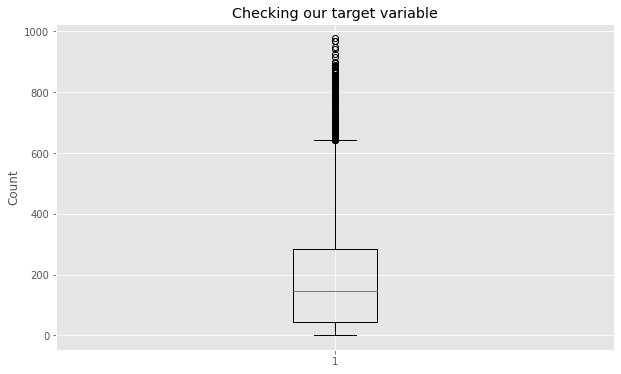

In [68]:
plt.boxplot(train['count'])
plt.ylabel("Count")
plt.title("Checking our target variable")

We'll see some categorical variables

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Weather'),
 Text(0.5, 1.0, 'Box Plot On Count Across Weather')]

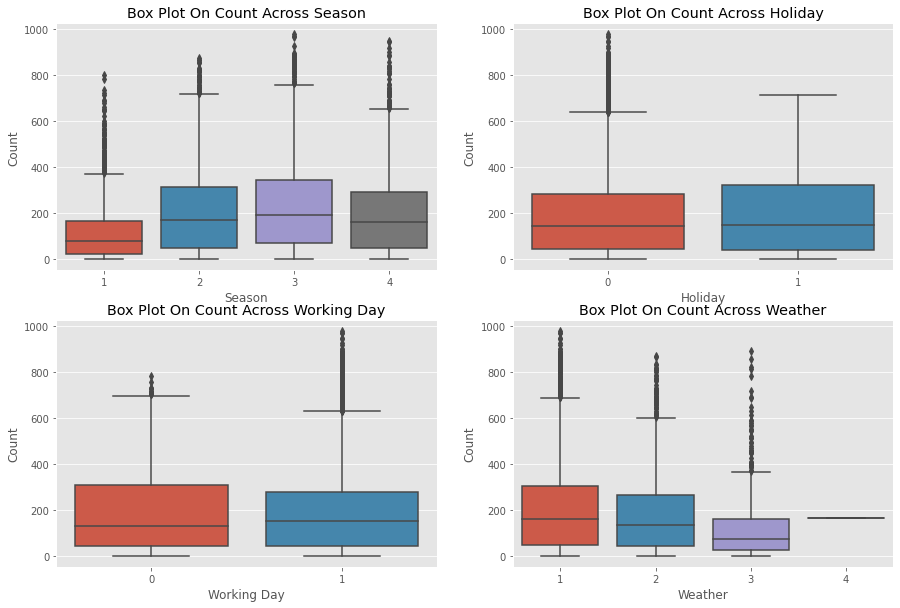

In [69]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(15, 10)
sn.boxplot(data = train, y = "count", x = "season", orient = "v", ax = axes[0][0])
sn.boxplot(data = train, y = "count", x = "holiday", orient = "v", ax = axes[0][1])
sn.boxplot(data = train, y = "count", x = "workingday", orient = "v", ax = axes[1][0])
sn.boxplot(data = train, y = "count", x = "weather", orient = "v", ax = axes[1][1])


axes[0][0].set(xlabel = 'Season', ylabel = 'Count', title = "Box Plot On Count Across Season")
axes[0][1].set(xlabel = 'Holiday', ylabel = 'Count', title = "Box Plot On Count Across Holiday")
axes[1][0].set(xlabel = 'Working Day', ylabel = 'Count', title = "Box Plot On Count Across Working Day")
axes[1][1].set(xlabel = 'Weather', ylabel = 'Count', title = "Box Plot On Count Across Weather")

We can get some points from the graphs above:

*   Spring season has got relatively lower count
*   In holiday people tend to use bikes more and also if it's not a working day
*   We can see a big difference in the count depending on the weather.






Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


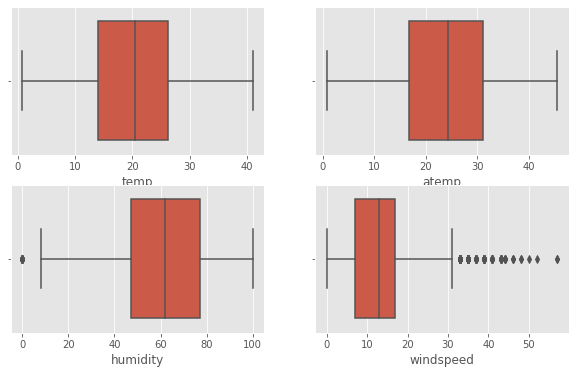

In [70]:
cont_names=['temp','atemp','humidity','windspeed']

i=0
for name in cont_names:
    i=i+1
    plt.subplot(2,2,i)
    sn.boxplot(name,data=train) 
    
plt.show()

From above graphs we can see that windspeed has a lot of outliers. 

**Feature Engineering**

In [71]:
from datetime import datetime

train['datetime'] = train['datetime'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

train['month'] = train['datetime'].apply(lambda x:x.month)
train['hour'] = train['datetime'].apply(lambda x:x.hour)
train['day'] = train['datetime'].apply(lambda x:x.day)
train['year'] = train['datetime'].apply(lambda x:x.year)




test['datetime'] = test['datetime'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

test['month'] = test['datetime'].apply(lambda x:x.month)
test['hour'] = test['datetime'].apply(lambda x:x.hour)
test['day'] = test['datetime'].apply(lambda x:x.day)
test['year'] = test['datetime'].apply(lambda x:x.year)

In [72]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour,day,year
2408,2011-06-08 06:00:00,2,0,1,1,26.24,28.790,89,8.9981,13,103,116,6,6,8,2011
7729,2012-06-02 10:00:00,2,0,0,1,24.60,31.060,53,19.9995,145,348,493,6,10,2,2012
2554,2011-06-14 08:00:00,2,0,1,1,23.78,27.275,49,26.0027,45,441,486,6,8,14,2011
6855,2012-04-03 23:00:00,2,0,1,1,20.50,24.240,59,0.0000,13,66,79,4,23,3,2012
8134,2012-06-19 07:00:00,2,0,1,2,24.60,28.790,78,8.9981,18,462,480,6,7,19,2012


In [73]:
train.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour,day,year
season,1.000000,0.032398,-0.006765,0.008306,0.257837,0.264042,0.184392,-0.150029,0.097626,0.162984,0.162846,0.971277,-0.004383,0.001024,-0.011660
holiday,0.032398,1.000000,-0.250182,-0.005035,0.008517,0.002770,0.000166,0.011592,0.047802,-0.017799,-0.001393,0.004486,0.000801,-0.014356,0.011629
workingday,-0.006765,-0.250182,1.000000,0.030160,0.023014,0.019072,-0.008417,0.009348,-0.324732,0.115935,0.005322,-0.001288,0.001151,0.007246,-0.002546
weather,0.008306,-0.005035,0.030160,1.000000,-0.052991,-0.054618,0.413032,0.009134,-0.132637,-0.109102,-0.127874,0.011188,-0.027631,-0.016284,-0.005393
temp,0.257837,0.008517,0.023014,-0.052991,1.000000,0.986007,-0.063906,-0.021851,0.462643,0.313354,0.390175,0.256295,0.139582,0.018954,0.054642
atemp,0.264042,0.002770,0.019072,-0.054618,0.986007,1.000000,-0.043916,-0.061378,0.459161,0.311119,0.387341,0.263188,0.135246,0.016175,0.052461
humidity,0.184392,0.000166,-0.008417,0.413032,-0.063906,-0.043916,1.000000,-0.315204,-0.350964,-0.266432,-0.319862,0.199184,-0.279179,-0.011730,-0.079732
windspeed,-0.150029,0.011592,0.009348,0.009134,-0.021851,-0.061378,-0.315204,1.000000,0.091801,0.081020,0.093083,-0.153469,0.143575,0.034495,-0.009073
casual,0.097626,0.047802,-0.324732,-0.132637,0.462643,0.459161,-0.350964,0.091801,1.000000,0.494487,0.691393,0.092466,0.300987,0.012584,0.143543
registered,0.162984,-0.017799,0.115935,-0.109102,0.313354,0.311119,-0.266432,0.081020,0.494487,1.000000,0.969853,0.167874,0.378512,0.018916,0.263394




*   temp y atemp seem to be similar. We can delete one of them
*   We also will delete casual and registered.
*   Working day and holiday as we see in the graphs tend to be similar so we can delete one.





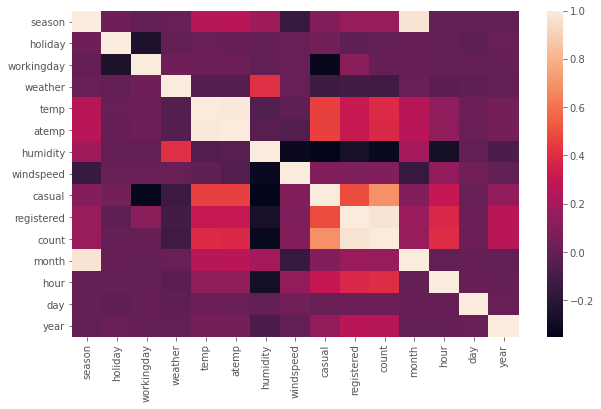

In [74]:
train.cov()
sn.heatmap(train.corr())
plt.show()

In [75]:
train.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
month                  int64
hour                   int64
day                    int64
year                   int64
dtype: object

As we see, the columns "season", "holiday", "workingday" and "weather" should be of "categorical" data type. But the current data type is "int" for those columns. We'll transform the dataset in the following ways so that we can get started up with our EDA.



*   Create new columns "date, "hour", "weekDay", "month" from "datetime" column. Because of this we'll delete the "datetime" column
*   Convert the datatype of "season","holiday","workingday" and "weather" to category.



In [76]:
train=train.drop(['datetime','temp','casual','registered','day'], axis=1)
train.head()

,season,holiday,workingday,weather,atemp,humidity,windspeed,count,month,hour,year
2408,2,0,1,1,28.790,89,8.9981,116,6,6,2011
7729,2,0,0,1,31.060,53,19.9995,493,6,10,2012
2554,2,0,1,1,27.275,49,26.0027,486,6,8,2011
6855,2,0,1,1,24.240,59,0.0000,79,4,23,2012
8134,2,0,1,2,28.790,78,8.9981,480,6,7,2012


In [77]:
test=test.drop(['datetime','temp','casual','registered','day'], axis=1)
test.head()

,season,holiday,workingday,weather,atemp,humidity,windspeed,count,month,hour,year
927,1,0,1,1,8.335,27,31.0009,3,3,2,2011
9009,3,0,1,2,12.120,38,16.9979,669,8,18,2012
3938,3,0,1,1,29.545,73,6.0032,8,9,3,2011
1538,2,0,0,2,19.695,87,6.0032,57,4,23,2011
10171,4,0,1,1,14.395,56,12.9980,27,11,5,2012


In [78]:
train.dtypes

season          int64
holiday         int64
workingday      int64
weather         int64
atemp         float64
humidity        int64
windspeed     float64
count           int64
month           int64
hour            int64
year            int64
dtype: object

In [79]:
categoricalFeatureNames = ["season","holiday","workingday","weather","month","year","hour"]
for var in categoricalFeatureNames:
    train[var] = train[var].astype("category")
    test[var] = test[var].astype("category")

In [80]:
train.dtypes

season        category
holiday       category
workingday    category
weather       category
atemp          float64
humidity         int64
windspeed      float64
count            int64
month         category
hour          category
year          category
dtype: object

In [81]:
train['count'].describe()

count    8708.000000
mean      191.413298
std       180.281162
min         1.000000
25%        43.000000
50%       145.000000
75%       283.000000
max       977.000000
Name: count, dtype: float64

Skew is:  1.241578888663998


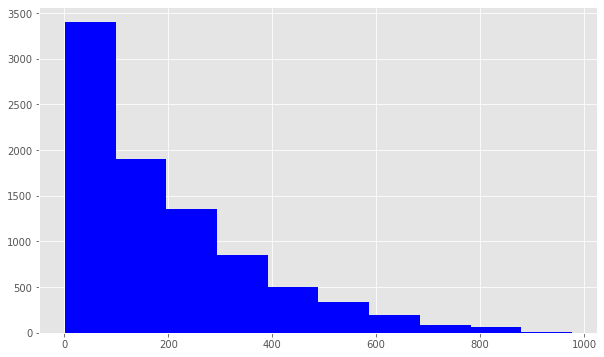

In [82]:
print("Skew is: ", train['count'].skew())
plt.style.use(style="ggplot")
plt.rcParams["figure.figsize"]=(10,6)
plt.hist(train['count'],color="blue")
plt.show()

Skew is:  1.2434797246061844


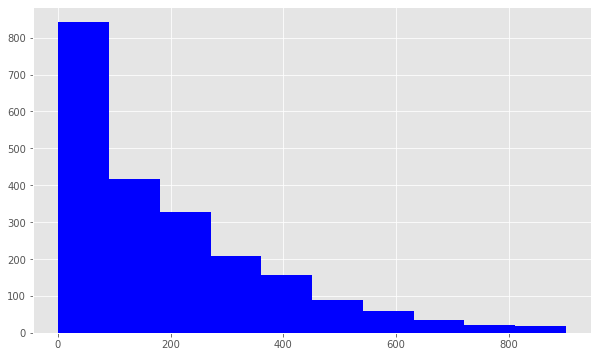

In [83]:
print("Skew is: ", test['count'].skew())
plt.style.use(style="ggplot")
plt.rcParams["figure.figsize"]=(10,6)
plt.hist(test['count'],color="blue")
plt.show()

Our variable to predict is skewed so we apply the logarithm. The logarithm reduces the dynamic range of a variable so the differences are preserved while the scale is not dramatically skewed.

In [84]:
train['count'] = np.log1p(train['count'])
train['count'].head(10)

2408    4.762174
7729    6.202536
2554    6.188264
6855    4.382027
8134    6.175867
3080    3.091042
8450    5.666427
5576    5.783825
6175    4.948760
437     3.970292
Name: count, dtype: float64

In [85]:
test['count'] = np.log1p(test['count'])
test['count'].head(10)

927      1.386294
9009     6.507278
3938     2.197225
1538     4.060443
10171    3.332205
9647     5.332719
4852     4.691348
5936     5.293305
9617     2.484907
3892     3.044522
Name: count, dtype: float64

In [86]:
train.head()

,season,holiday,workingday,weather,atemp,humidity,windspeed,count,month,hour,year
2408,2,0,1,1,28.790,89,8.9981,4.762174,6,6,2011
7729,2,0,0,1,31.060,53,19.9995,6.202536,6,10,2012
2554,2,0,1,1,27.275,49,26.0027,6.188264,6,8,2011
6855,2,0,1,1,24.240,59,0.0000,4.382027,4,23,2012
8134,2,0,1,2,28.790,78,8.9981,6.175867,6,7,2012


In [87]:
test.head()

,season,holiday,workingday,weather,atemp,humidity,windspeed,count,month,hour,year
927,1,0,1,1,8.335,27,31.0009,1.386294,3,2,2011
9009,3,0,1,2,12.120,38,16.9979,6.507278,8,18,2012
3938,3,0,1,1,29.545,73,6.0032,2.197225,9,3,2011
1538,2,0,0,2,19.695,87,6.0032,4.060443,4,23,2011
10171,4,0,1,1,14.395,56,12.9980,3.332205,11,5,2012


From our categorical variables we need to separate these in nominal and ordinal. In ordinal variables we'll apply label encoding and in nominal we'll apply one hot encoding. However, checking the features that are ordinal I think that we should only transform these to float and we'll keep the information. Because if for example we apply label enconder to the season feature we will lose the order of the season. Maybe if we have an example that has value 1 and then we apply label encoder it can transform the value to 2,3 or 4.

In [88]:
nominal = [ 'holiday', 'workingday', 'weather', 'year']

ordinal = [ 'season', 'month', 'hour'] 

In [89]:
for var in ordinal:
    train[var] = train[var].astype("float64")
    test[var] = test[var].astype("float64")

In [90]:
train.dtypes

season         float64
holiday       category
workingday    category
weather       category
atemp          float64
humidity         int64
windspeed      float64
count          float64
month          float64
hour           float64
year          category
dtype: object

In [91]:
test.dtypes

season         float64
holiday       category
workingday    category
weather       category
atemp          float64
humidity         int64
windspeed      float64
count          float64
month          float64
hour           float64
year          category
dtype: object

**One hot encoding**

In [92]:
train = pd.get_dummies(train, drop_first=True)
train.shape

(8708, 13)

In [93]:
train

,season,atemp,humidity,windspeed,count,month,hour,holiday_1,workingday_1,weather_2,weather_3,weather_4,year_2012
2408,2.0,28.790,89,8.9981,4.762174,6.0,6.0,0,1,0,0,0,0
7729,2.0,31.060,53,19.9995,6.202536,6.0,10.0,0,0,0,0,0,1
2554,2.0,27.275,49,26.0027,6.188264,6.0,8.0,0,1,0,0,0,0
6855,2.0,24.240,59,0.0000,4.382027,4.0,23.0,0,1,0,0,0,1
8134,2.0,28.790,78,8.9981,6.175867,6.0,7.0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3162,3.0,39.395,27,0.0000,5.446737,8.0,16.0,0,1,0,0,0,0
1373,2.0,13.635,70,8.9981,3.218876,4.0,2.0,0,0,0,0,0,0
2599,2.0,30.305,64,12.9980,3.258097,6.0,5.0,0,1,0,0,0,0
2106,2.0,25.760,94,12.9980,5.690359,5.0,16.0,0,0,1,0,0,0


In [94]:
test = pd.get_dummies(test, drop_first=True)
test.shape

(2178, 12)

In [95]:
test

,season,atemp,humidity,windspeed,count,month,hour,holiday_1,workingday_1,weather_2,weather_3,year_2012
927,1.0,8.335,27,31.0009,1.386294,3.0,2.0,0,1,0,0,0
9009,3.0,12.120,38,16.9979,6.507278,8.0,18.0,0,1,1,0,1
3938,3.0,29.545,73,6.0032,2.197225,9.0,3.0,0,1,0,0,0
1538,2.0,19.695,87,6.0032,4.060443,4.0,23.0,0,0,1,0,0
10171,4.0,14.395,56,12.9980,3.332205,11.0,5.0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1087,1.0,15.910,87,12.9980,4.521789,3.0,20.0,0,1,1,0,0
7407,2.0,25.000,52,16.9979,3.663562,5.0,0.0,0,1,1,0,1
7339,2.0,26.515,88,7.0015,2.302585,5.0,4.0,0,0,0,0,1
10856,4.0,19.695,46,22.0028,6.265301,12.0,18.0,0,1,0,0,1


As we saw above train and test have different shape. We need them to have the same size so we'll apply a inner join in order to let themn with the same quantity of columns

In [96]:
train, test = train.align(test, join='inner', axis=1)

In [97]:
train.shape

(8708, 12)

In [98]:
test.shape

(2178, 12)

In [99]:
# Visualize all the features that have missing values
train_missing = train.isna().sum() / train.shape[0]
train_missing[train_missing > 0.0].sort_values(ascending=False)

Series([], dtype: float64)

In [100]:
# Visualize all the features that have missing values
test_missing = test.isna().sum() / test.shape[0]
test_missing[test_missing > 0.0].sort_values(ascending=False)

Series([], dtype: float64)

In [101]:
y_train=train['count']
X_train=train.drop(["count"], axis=1)
y_test=test["count"]
X_test=test.drop(["count"], axis=1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)



(8708, 11)
(8708,)
(2178, 11)
(2178,)


**Models**

In [102]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

**Linear Regression**

In [103]:
lr=linear_model.LinearRegression()
lr.fit(X_train,y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
mse_train = mean_squared_error(y_train,y_pred_train)
rmse_train = sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)

print("MSE train: " + str(mse_train))
print("RMSE train: " + str(rmse_train))
print("MAPE train: " + str(mape_train))

mse_test = mean_squared_error(y_test,y_pred_test)
rmse_test = sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

print("MSE test: " + str(mse_test))
print("RMSE test: " + str(rmse_test))
print("MAPE test: " + str(mape_test))


MSE train: 1.016685490663572
RMSE train: 1.0083082319725314
MAPE train: 25.911151580843576
MSE test: 1.054731833920801
RMSE test: 1.0270013797073503
MAPE test: 27.77703030417985


**Random Forest**

In [104]:
rfc = RandomForestRegressor()
rfc.fit(X_train, y_train)
y_pred_train = rfc.predict(X_train)
y_pred_test = rfc.predict(X_test)

mse_train = mean_squared_error(y_train,y_pred_train)
rmse_train = sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)

print("MSE train: " + str(mse_train))
print("RMSE train: " + str(rmse_train))
print("MAPE train: " + str(mape_train))

mse_test = mean_squared_error(y_test,y_pred_test)
rmse_test = sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

print("MSE test: " + str(mse_test))
print("RMSE test: " + str(rmse_test))
print("MAPE test: " + str(mape_test))


MSE train: 0.015410849811702137
RMSE train: 0.12414044390005272
MAPE train: 2.7892593355576203
MSE test: 0.10921463426813789
RMSE test: 0.33047637475035624
MAPE test: 7.774338265390064


In [105]:
train.columns

Index(['season', 'atemp', 'humidity', 'windspeed', 'count', 'month', 'hour',
       'holiday_1', 'workingday_1', 'weather_2', 'weather_3', 'year_2012'],
      dtype='object')

In [106]:
feature_list = ['season', 'atemp', 'humidity', 'windspeed', 'month', 'hour',
       'holiday_1', 'workingday_1', 'weather_2', 'weather_3', 'year_2012']
# Get numerical feature importances
importances = list(rfc.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances if (pair[1] > 0.0)];

Variable: hour                 Importance: 0.76
Variable: atemp                Importance: 0.06
Variable: workingday_1         Importance: 0.05
Variable: month                Importance: 0.04
Variable: year_2012            Importance: 0.03
Variable: humidity             Importance: 0.02
Variable: season               Importance: 0.01
Variable: windspeed            Importance: 0.01
Variable: weather_3            Importance: 0.01


In [107]:
new_train = train[['hour', 'atemp', 'month', 'workingday_1', 
                   'humidity', 'year_2012', 'season', 'count']]

new_test = test[['hour', 'atemp', 'month', 'workingday_1', 
                   'humidity', 'year_2012', 'season', 'count']]

In [108]:
y_train_new = new_train['count']
X_train_new = new_train.drop(["count"], axis=1)
y_test_new = new_test['count']
X_test_new = new_test.drop(["count"], axis=1)
print(X_train_new.shape)
print(X_test_new.shape)
print(y_train_new.shape)
print(y_test_new.shape)

(8708, 7)
(2178, 7)
(8708,)
(2178,)


In [109]:
rfc = RandomForestRegressor()
rfc.fit(X_train_new, y_train_new)
y_pred_train = rfc.predict(X_train_new)
y_pred_test = rfc.predict(X_test_new)

mse_train = mean_squared_error(y_train_new,y_pred_train)
rmse_train = sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train_new, y_pred_train)

print("MSE train: " + str(mse_train))
print("RMSE train: " + str(rmse_train))
print("MAPE train: " + str(mape_train))

mse_test = mean_squared_error(y_test_new,y_pred_test)
rmse_test = sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test_new, y_pred_test)

print("MSE test: " + str(mse_test))
print("RMSE test: " + str(rmse_test))
print("MAPE test: " + str(mape_test))

MSE train: 0.019352963594158373
RMSE train: 0.13911492944381768
MAPE train: 3.0348796244904443
MSE test: 0.1208985316379137
RMSE test: 0.34770466151306295
MAPE test: 8.031929414011465


In order to find the better combination of parameters we'll use RandomizedSearch over GridSearch as it's more efficient.

In [51]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, n_jobs = -1)

In [52]:
rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits


A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.


{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

In [52]:
rfc = RandomForestRegressor(n_estimators = 200, bootstrap = True, max_depth = 20, max_features = 'auto', min_samples_leaf = 1, min_samples_split = 5)
rfc.fit(X_train, y_train)
y_pred_train = rfc.predict(X_train)
y_pred_test = rfc.predict(X_test)

mse_train = mean_squared_error(y_train,y_pred_train)
rmse_train = sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)

print("MSE train: " + str(mse_train))
print("RMSE train: " + str(rmse_train))
print("MAPE train: " + str(mape_train))

mse_test = mean_squared_error(y_test,y_pred_test)
rmse_test = sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

print("MSE test: " + str(mse_test))
print("RMSE test: " + str(rmse_test))
print("MAPE test: " + str(mape_test))

MSE train: 0.02762164462957704
RMSE train: 0.16619760717163481
MAPE train: 3.7878583590679
MSE test: 0.10403119662276081
RMSE test: 0.322538674615558
MAPE test: 6.945307444868051


**Gradient Boosting**

In [110]:
grad_boost = GradientBoostingRegressor()
grad_boost.fit(X_train, y_train)
y_pred_train = grad_boost.predict(X_train)
y_pred_test = grad_boost.predict(X_test)

mse_train = mean_squared_error(y_train,y_pred_train)
rmse_train = sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)

print("MSE train: " + str(mse_train))
print("RMSE train: " + str(rmse_train))
print("MAPE train: " + str(mape_train))

mse_test = mean_squared_error(y_test,y_pred_test)
rmse_test = sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

print("MSE test: " + str(mse_test))
print("RMSE test: " + str(rmse_test))
print("MAPE test: " + str(mape_test))

MSE train: 0.1525343668286336
RMSE train: 0.39055648353168276
MAPE train: 9.225102710031004
MSE test: 0.1584228088172006
RMSE test: 0.39802362846595
MAPE test: 9.769757763735596


**XGB Regressor**

In [111]:
xgb = xgboost.XGBRegressor() 

xgb.fit(X_train, y_train)
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

mse_train = mean_squared_error(y_train,y_pred_train)
rmse_train = sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)

print("MSE train: " + str(mse_train))
print("RMSE train: " + str(rmse_train))
print("MAPE train: " + str(mape_train))

mse_test = mean_squared_error(y_test,y_pred_test)
rmse_test = sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

print("MSE test: " + str(mse_test))
print("RMSE test: " + str(rmse_test))
print("MAPE test: " + str(mape_test))

[16:47:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE train: 0.13485409184949607
RMSE train: 0.36722485189526055
MAPE train: 8.719720277988205
MSE test: 0.14270231916000317
RMSE test: 0.3777596049870912
MAPE test: 9.31469391746638


**CatBoost Regressor**

In [112]:
cat_model = catboost.CatBoostRegressor()


cat_model.fit(X_train, y_train)
y_pred_train = cat_model.predict(X_train)
y_pred_test = cat_model.predict(X_test)

mse_train = mean_squared_error(y_train,y_pred_train)
rmse_train = sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)

print("MSE train: " + str(mse_train))
print("RMSE train: " + str(rmse_train))
print("MAPE train: " + str(mape_train))

mse_test = mean_squared_error(y_test,y_pred_test)
rmse_test = sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

print("MSE test: " + str(mse_test))
print("RMSE test: " + str(rmse_test))
print("MAPE test: " + str(mape_test))

Learning rate set to 0.057373
0:	learn: 1.3525272	total: 2.26ms	remaining: 2.26s
1:	learn: 1.2991023	total: 3.98ms	remaining: 1.99s
2:	learn: 1.2533342	total: 5.66ms	remaining: 1.88s
3:	learn: 1.2053313	total: 7.37ms	remaining: 1.83s
4:	learn: 1.1638913	total: 9.18ms	remaining: 1.83s
5:	learn: 1.1226640	total: 11ms	remaining: 1.82s
6:	learn: 1.0833606	total: 12.8ms	remaining: 1.81s
7:	learn: 1.0443713	total: 14.7ms	remaining: 1.82s
8:	learn: 1.0107555	total: 16.4ms	remaining: 1.81s
9:	learn: 0.9798700	total: 18.3ms	remaining: 1.81s
10:	learn: 0.9492482	total: 20.1ms	remaining: 1.81s
11:	learn: 0.9217414	total: 21.8ms	remaining: 1.79s
12:	learn: 0.8964356	total: 23.5ms	remaining: 1.78s
13:	learn: 0.8685120	total: 25.1ms	remaining: 1.77s
14:	learn: 0.8452828	total: 26.8ms	remaining: 1.76s
15:	learn: 0.8199263	total: 28.7ms	remaining: 1.77s
16:	learn: 0.7964432	total: 30.4ms	remaining: 1.76s
17:	learn: 0.7781544	total: 32.1ms	remaining: 1.75s
18:	learn: 0.7613842	total: 33.8ms	remaining: 

**Light GBM**

In [113]:
lgbm_regressor = lgb.LGBMRegressor()

lgbm_regressor.fit(X_train, y_train)
y_pred_train = lgbm_regressor.predict(X_train)
y_pred_test = lgbm_regressor.predict(X_test)

mse_train = mean_squared_error(y_train,y_pred_train)
rmse_train = sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)

print("MSE train: " + str(mse_train))
print("RMSE train: " + str(rmse_train))
print("MAPE train: " + str(mape_train))

mse_test = mean_squared_error(y_test,y_pred_test)
rmse_test = sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

print("MSE test: " + str(mse_test))
print("RMSE test: " + str(rmse_test))
print("MAPE test: " + str(mape_test))

MSE train: 0.0685879337347816
RMSE train: 0.26189298145384043
MAPE train: 6.09766863518317
MSE test: 0.09540069536779261
RMSE test: 0.3088700298957356
MAPE test: 7.406916208483012


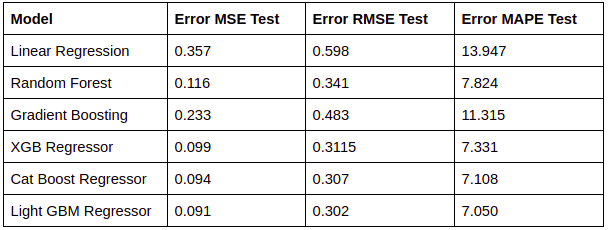

Now we're going to try some other tools like optuna, shap values in order to improve our work. We'll use these tools with Random Forest and XGB Regressor

In [114]:

# 10-fold CV
kfolds = KFold(n_splits=10, shuffle=True)

# Define the helper function so that it can be reused
def tune(objective):
    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=100)

    params = study.best_params
    best_score = study.best_value
    print(f"Best score: {best_score}\n")
    print(f"Optimized parameters: {params}\n")
    return params

In [115]:
def rmse(model,x,y):
    return -(cross_val_score(model, x, y, cv=kfolds, scoring='neg_root_mean_squared_error',n_jobs=-1))

In [116]:
##################
# Random Forest
##################
def randomforest_objective(trial):
    _n_estimators = trial.suggest_int("n_estimators", 300, 1500)
    _max_depth = trial.suggest_int("max_depth", 5, 20)
    _min_samp_split = trial.suggest_int("min_samples_split", 2, 10)
    _min_samples_leaf = trial.suggest_int("min_samples_leaf", 2, 10)
    _max_features = trial.suggest_int("max_features", 2, 10)

    rf = RandomForestRegressor(
        max_depth=_max_depth,
        min_samples_split=_min_samp_split,
        min_samples_leaf=_min_samples_leaf,
        max_features=_max_features,
        n_estimators=_n_estimators,
        n_jobs=-1,
    )

    scores = rmse(rf, X_train, y_train)
    return scores.mean()

randomforest_params = tune(randomforest_objective)
rf = RandomForestRegressor(n_jobs=-1, **randomforest_params)

[I 2021-04-30 16:48:02,511] A new study created in memory with name: no-name-2490ae8a-a4db-4ad1-921c-b592e4e4cca8
[I 2021-04-30 16:48:31,706] Trial 0 finished with value: 0.33573791304333567 and parameters: {'n_estimators': 326, 'max_depth': 14, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_features': 8}. Best is trial 0 with value: 0.33573791304333567.
[I 2021-04-30 16:50:12,203] Trial 1 finished with value: 0.35303084450991745 and parameters: {'n_estimators': 1251, 'max_depth': 19, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 9}. Best is trial 0 with value: 0.33573791304333567.
[I 2021-04-30 16:50:21,425] Trial 2 finished with value: 0.6490987598189978 and parameters: {'n_estimators': 354, 'max_depth': 6, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': 3}. Best is trial 0 with value: 0.33573791304333567.
[I 2021-04-30 16:52:14,120] Trial 3 finished with value: 0.3573940592704766 and parameters: {'n_estimators': 1423, 'max_depth': 11, 'min_sampl

Best score: 0.32736979255690424

Optimized parameters: {'n_estimators': 1290, 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 9}



In [117]:
rfc = RandomForestRegressor(n_estimators = 1290, max_depth = 20, min_samples_leaf = 2, min_samples_split = 4, max_features=9)
rfc.fit(X_train, y_train)
y_pred_train = rfc.predict(X_train)
y_pred_test = rfc.predict(X_test)
mse_train = mean_squared_error(y_train,y_pred_train)
rmse_train = sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)

print("MSE train: " + str(mse_train))
print("RMSE train: " + str(rmse_train))
print("MAPE train: " + str(mape_train))

mse_test = mean_squared_error(y_test,y_pred_test)
rmse_test = sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

print("MSE test: " + str(mse_test))
print("RMSE test: " + str(rmse_test))
print("MAPE test: " + str(mape_test))

MSE train: 0.03176329371668746
RMSE train: 0.17822259597673765
MAPE train: 3.9864772301539357
MSE test: 0.10932166644619125
RMSE test: 0.33063827129688306
MAPE test: 7.745737797793016


In [122]:
##################
# XGBoost
##################
def xgboost_objective(trial):
    _colsample_bytree = trial.suggest_float("colsample_bytree", 0.1, 0.9, log = True)
    _gamma = trial.suggest_int("gamma", 0, 10)
    _learning_rate = trial.suggest_float("learning_rate", 0.1, 0.6, log = True)
    _max_depth = trial.suggest_int("max_depth", 3, 9)
    _min_child_weight = trial.suggest_int("min_child_weight", 1, 9)
    _reg_alpha = trial.suggest_float("reg_alpha", 0.3, 0.9, log = True)
    _reg_lambda = trial.suggest_float("reg_lambda", 0.3, 0.9, log = True)
    _subsample = trial.suggest_float("subsample", 0.1, 0.9, log = True)
    xgb = xgboost.XGBRegressor(
        colsample_bytree=_colsample_bytree,
        gamma = _gamma,
        learning_rate = _learning_rate,
        max_depth = _max_depth,
        min_child_weight = _min_child_weight,
        reg_alpha = _reg_alpha,
        reg_lambda = _reg_lambda,
        subsample = _subsample,
        n_jobs=-1,
    )

    scores = rmse(xgb, X_train, y_train)
    return scores.mean()

xgboost_params = tune(xgboost_objective)
xgb = xgboost.XGBRegressor(n_jobs=-1, **xgboost_params)

[I 2021-04-30 19:29:11,879] A new study created in memory with name: no-name-51350111-1c6b-44b7-a8a8-6c8651779ca5
[I 2021-04-30 19:29:14,863] Trial 0 finished with value: 0.6138487817044285 and parameters: {'colsample_bytree': 0.1433829591027519, 'gamma': 9, 'learning_rate': 0.5418920387151301, 'max_depth': 5, 'min_child_weight': 6, 'reg_alpha': 0.3560585859280607, 'reg_lambda': 0.3939883445029901, 'subsample': 0.23977971946722648}. Best is trial 0 with value: 0.6138487817044285.
[I 2021-04-30 19:29:17,196] Trial 1 finished with value: 0.5809507798852547 and parameters: {'colsample_bytree': 0.20647128903789888, 'gamma': 4, 'learning_rate': 0.13958462837994307, 'max_depth': 6, 'min_child_weight': 5, 'reg_alpha': 0.3783713421784834, 'reg_lambda': 0.8039125004051227, 'subsample': 0.4935203589373021}. Best is trial 1 with value: 0.5809507798852547.
[I 2021-04-30 19:29:19,040] Trial 2 finished with value: 0.5674988481823786 and parameters: {'colsample_bytree': 0.19427055945743787, 'gamma': 

Best score: 0.3073995366852119

Optimized parameters: {'colsample_bytree': 0.7932398993730398, 'gamma': 0, 'learning_rate': 0.27829690484356906, 'max_depth': 5, 'min_child_weight': 9, 'reg_alpha': 0.7046737665412303, 'reg_lambda': 0.4568712325959193, 'subsample': 0.8978824844121535}



In [123]:
xgb = xgboost.XGBRegressor(colsample_bytree= 0.7932398993730398,
                 gamma=0,             
                 learning_rate=0.27829690484356906,
                 max_depth=5,
                 min_child_weight=9,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.7046737665412303,
                 reg_lambda=0.4568712325959193,
                 subsample=0.8978824844121535
                 ) 

xgb.fit(X_train, y_train)
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

mse_train = mean_squared_error(y_train,y_pred_train)
rmse_train = sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)

print("MSE train: " + str(mse_train))
print("RMSE train: " + str(rmse_train))
print("MAPE train: " + str(mape_train))

mse_test = mean_squared_error(y_test,y_pred_test)
rmse_test = sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

print("MSE test: " + str(mse_test))
print("RMSE test: " + str(rmse_test))
print("MAPE test: " + str(mape_test))

[19:38:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE train: 0.0050865611582832735
RMSE train: 0.07132013150775364
MAPE train: 1.520101064332098
MSE test: 0.11142558630760357
RMSE test: 0.333804712830127
MAPE test: 7.957711791871266


In [124]:
rfc = RandomForestRegressor(n_estimators = 200, bootstrap = True, max_depth = 20, max_features = 'auto', min_samples_leaf = 1, min_samples_split = 5)
rfc.fit(X_train, y_train)
y_pred_train = rfc.predict(X_train)
y_pred_test = rfc.predict(X_test)

mse_train = mean_squared_error(y_train,y_pred_train)
rmse_train = sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)

print("MSE train: " + str(mse_train))
print("RMSE train: " + str(rmse_train))
print("MAPE train: " + str(mape_train))

mse_test = mean_squared_error(y_test,y_pred_test)
rmse_test = sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

print("MSE test: " + str(mse_test))
print("RMSE test: " + str(rmse_test))
print("MAPE test: " + str(mape_test))

MSE train: 0.02729459308647759
RMSE train: 0.16521075354370124
MAPE train: 3.7246748021658656
MSE test: 0.11027683793321232
RMSE test: 0.3320795656664413
MAPE test: 7.736198425423854


In [125]:
xgb = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,             
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 

xgb.fit(X_train, y_train)
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

mse_train = mean_squared_error(y_train,y_pred_train)
rmse_train = sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)

print("MSE train: " + str(mse_train))
print("RMSE train: " + str(rmse_train))
print("MAPE train: " + str(mape_train))

mse_test = mean_squared_error(y_test,y_pred_test)
rmse_test = sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

print("MSE test: " + str(mse_test))
print("RMSE test: " + str(rmse_test))
print("MAPE test: " + str(mape_test))

[19:40:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE train: 0.05302464051638123
RMSE train: 0.2302707982276112
MAPE train: 5.337860334064884
MSE test: 0.09735987627211905
RMSE test: 0.3120254417064722
MAPE test: 7.522975076877761


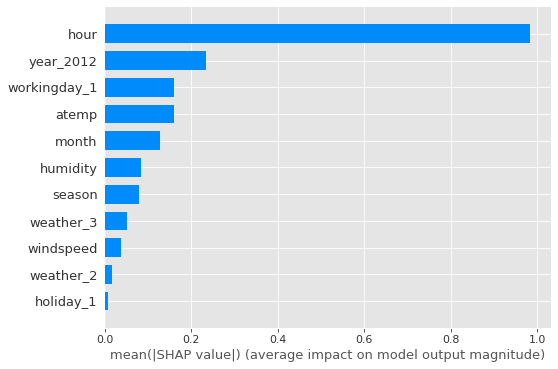

In [126]:
explainer_xgb = shap.TreeExplainer(xgb)
shap_values_xgb = explainer_xgb.shap_values(X_test, y_test, approximate=True)

shap.summary_plot(shap_values_xgb, X_test, plot_type = 'bar')

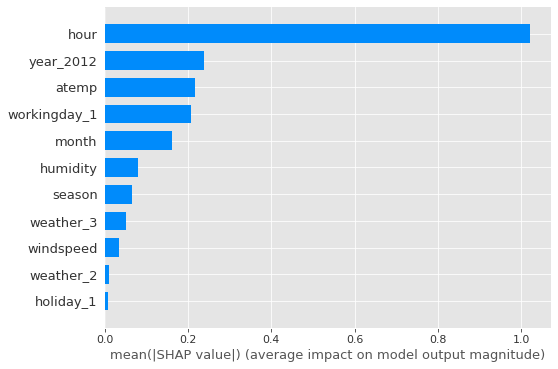

In [127]:
explainer_rfc = shap.TreeExplainer(rfc)
shap_values_rfc = explainer_rfc.shap_values(X_test, y_test, approximate=True)

shap.summary_plot(shap_values_rfc, X_test, plot_type = 'bar')

By far in both models the most important feature seems to be the hour.

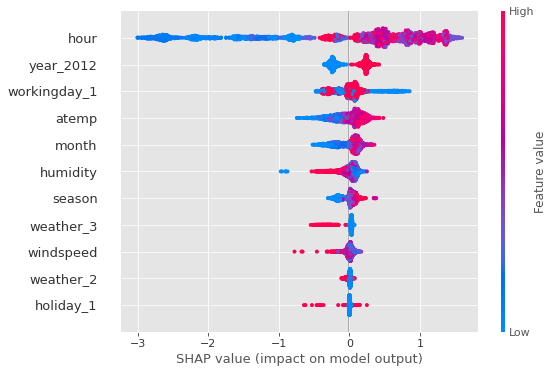

In [128]:
shap.summary_plot(shap_values_xgb, X_test)

- About feature hour we can see that with high values the count of rented bikes increases. 
- For weather 3 and 2 it seems that the count of rented bikes decreases when their value is 1.
- For high values of month the count of rented bikes increases. The same with the temperature (atemp).
- It seems that if it's not a working day, the count of rented bikes decreases

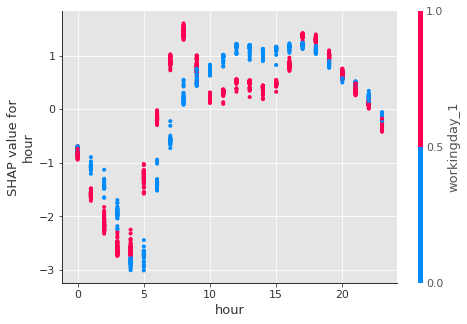

In [129]:
shap.dependence_plot("hour", shap_values_xgb, X_test)


If it's a working day we see that the count of rented bikes increases in the morning while people go to work and after the job when people return home. If it's not a working day, the count of rented bikes is similar during the day.

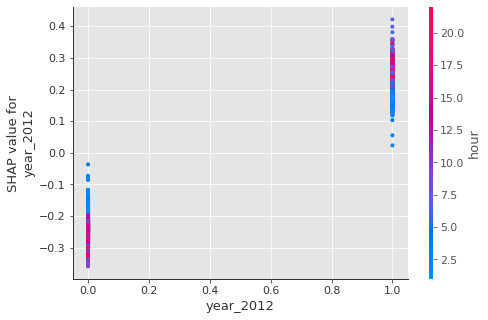

In [130]:
shap.dependence_plot("year_2012", shap_values_xgb, X_test)


It seems that in 2012 there were more rented bikes than in 2011

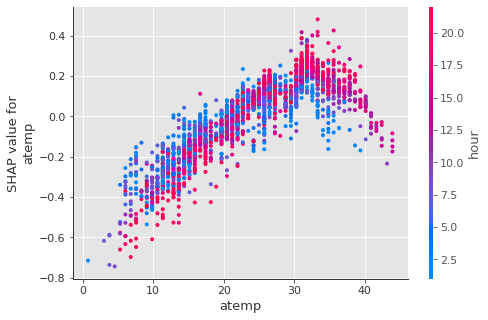

In [131]:
shap.dependence_plot("atemp", shap_values_xgb, X_test)


With low and high temperatures people don't prefer to ride bikes.

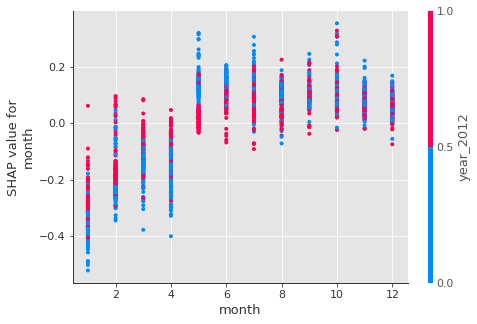

In [132]:
shap.dependence_plot("month", shap_values_xgb, X_test)


In [ ]:
There are months where people tend to use more bikes

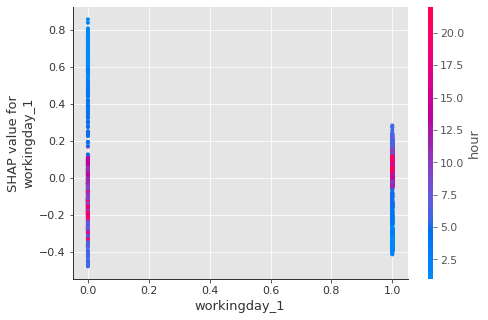

In [133]:
shap.dependence_plot("workingday_1", shap_values_xgb, X_test)


It seems that people in not working days rent bikes in early hours.

In [134]:
real_value=pd.DataFrame({'count':np.exp(y_test)})
predict_value=pd.DataFrame({'count':np.exp(y_pred_test)})
with pd.ExcelWriter('c:\\test.xls') as writer:
    real_value.to_excel(writer, sheet_name='Sheet1')
    predict_value.to_excel(writer, sheet_name='Sheet2')

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.


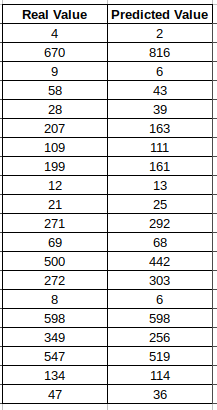

We should check the performance of our models in some data where it predicted a value very different from the real value.

In [135]:
X_test.loc[7085, [
'hour',
'year_2012',
'atemp',
'workingday_1',
'month',
'humidity',
'season',
'weather_3',
'windspeed',
'weather_2',
'holiday_1'
]]

hour            14.0
year_2012        1.0
atemp           25.0
workingday_1     1.0
month            4.0
humidity        27.0
season           2.0
weather_3        0.0
windspeed        0.0
weather_2        0.0
holiday_1        0.0
Name: 7085, dtype: float64

In [136]:
print("The real value is: " + str(round(np.exp(y_test.loc[7085]))))
print("The predicted value is: " + str(round(np.exp(y_pred_test[16]))))

The real value is: 349
The predicted value is: 257


In [137]:
X_test.loc[9597, [
'hour',
'year_2012',
'atemp',
'workingday_1',
'month',
'humidity',
'season',
'weather_3',
'windspeed',
'weather_2',
'holiday_1'
]]

hour             6.0000
year_2012        1.0000
atemp           27.2750
workingday_1     1.0000
month           10.0000
humidity        94.0000
season           4.0000
weather_3        1.0000
windspeed        6.0032
weather_2        0.0000
holiday_1        0.0000
Name: 9597, dtype: float64

In [138]:
print("The real value is: " + str(round(np.exp(y_test.loc[9597]))))
print("The predicted value is: " + str(round(np.exp(y_pred_test[18]))))

The real value is: 134
The predicted value is: 114


In [141]:
X_test.loc[9009, [
'hour',
'year_2012',
'atemp',
'workingday_1',
'month',
'humidity',
'season',
'weather_3',
'windspeed',
'weather_2',
'holiday_1'
]]

hour            18.0000
year_2012        1.0000
atemp           12.1200
workingday_1     1.0000
month            8.0000
humidity        38.0000
season           3.0000
weather_3        0.0000
windspeed       16.9979
weather_2        1.0000
holiday_1        0.0000
Name: 9009, dtype: float64

In [142]:
print("The real value is: " + str(round(np.exp(y_test.loc[9009]))))
print("The predicted value is: " + str(round(np.exp(y_pred_test[1]))))

The real value is: 670
The predicted value is: 817


Take a look in a value where our model predicted the same value as the real one

In [139]:
X_test.loc[6515, [
'hour',
'year_2012',
'atemp',
'workingday_1',
'month',
'humidity',
'season',
'weather_3',
'windspeed',
'weather_2',
'holiday_1'
]]

hour            17.0000
year_2012        1.0000
atemp           31.0600
workingday_1     1.0000
month            3.0000
humidity        38.0000
season           1.0000
weather_3        0.0000
windspeed       43.9989
weather_2        0.0000
holiday_1        0.0000
Name: 6515, dtype: float64

In [140]:
print("The real value is: " + str(round(np.exp(y_test.loc[6515]))))
print("The predicted value is: " + str(round(np.exp(y_pred_test[15]))))

The real value is: 598
The predicted value is: 598


In order to find possible explanations we should try changing the way of encoding features, make changes in features like adding, combining and deleting and see how our models react to these changes and their performance.